# Primero importamos las librerías necesarias en nuestro trabajo

In [3]:
# Load pandas
import pandas as pd
# Load numpy
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn

## Una vez tengamos las librerías cargadas,  recogemos la información de los múltiples csv que tenemos y la juntamos en un solo DataFrame.

### Además, aprovecharemos para ordenar el DataFrame primero por año y después de mes.

In [2]:
# Obtenemos los archivos de contaminación de la comunidad de Madrid.
fileList = ! ls ./Madrid/

# Creamos los nombres de las columnas.
columns=['ESTACION', 'MAGNITUD', 'TECNICA', 'DATO HORARIO', 'ANIO', 'MES', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
columns2010=['ESTACION', 'MAGNITUD', 'TECNICA', 'DATO HORARIO', 'ANIO', 'MES', 'DEL', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

# Creamos el DataFrame padre, donde se concatenarán los demás.
data = pd.DataFrame(columns=columns)

# Creamos un acumulador porque hasta el año 2010 se utiliza una codificación y a partir de ahí, otra distinta.
acc=0
# Añadimos todos los archivos en un mismo dataFrame para poder manipularlo.
for file_txt in fileList:
    
    # En caso de fichero anterior a 2010 o del 2010.
    if(acc < 10):
        table = pd.read_fwf('./Madrid/'+file_txt, widths=[8,2,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6], header=None, nwors = 3, names=columns2010)
        table = table.drop('DEL', 1)
    # En caso de fichero moderno.
    else:
        table = pd.read_fwf('./Madrid/'+file_txt, widths=[8,2,2,2,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6], header=None, nwors = 3, names=columns)
    acc=acc+1
    data =pd.concat([data,table])
    
# Ordenamos el DataFrame primero por año y después por mes.
data.sort_values(['ANIO', 'MES'], ascending=True)
# Reorganizamos el índice del DataFrame para que no haya indices repetidos.
data.set_index([range(0,len(data))], inplace=True)

data.head(5)

,ESTACION,MAGNITUD,TECNICA,DATO HORARIO,ANIO,MES,1,2,3,4,...,22,23,24,25,26,27,28,29,30,31
0,28079001,1,38,4,1,1,00.00N,00.00N,16.31V,17.04V,...,38.28V,17.27V,18.86V,15.91V,12.40V,19.51V,14.93V,30.14V,52.09V,51.93V
1,28079001,1,38,4,1,2,42.59V,53.49V,46.64V,23.04V,...,70.90V,54.40V,22.71V,15.07V,26.85V,22.15V,25.24V,00.00N,00.00N,00.00N
2,28079001,1,38,4,1,3,19.01V,17.30V,13.40V,10.58V,...,15.41V,31.62V,13.48V,6.650V,9.940V,13.57V,15.91V,13.81V,16.21V,18.24V
3,28079001,1,38,4,1,4,9.770V,15.25V,12.29V,11.29V,...,14.35V,11.27V,11.34V,13.20V,14.70V,14.66V,12.20V,17.29V,11.26V,00.00N
4,28079001,1,38,4,1,5,7.180V,8.700V,17.22V,18.64V,...,12.50V,15.35V,14.80V,16.16V,12.85V,9.280V,23.50V,18.99V,17.80V,19.62V


In [3]:
len(data)

34606

# Filtrado de datos
### Según el dosier facilitado por el ayuntamiento de Madrid, todos los datos que no contengan en su último carácter una 'V', no podrán ser considerados verificados.

### 1- Primero hay que decidir que mágnitudes queremos medir para extraerlas y analizarlas.


### 2- Una vez tengamos los datos filtrados, hay que formatear el dataFrame

In [ ]:
# PD: Se podría mejorar si se pusieran los valores correspondiendo con una regresión lineal de los valores si validados.
for d in data.index.values:
    for num in range(1,32):
        if data[str(num)][d][-1:].lower() == 'v':
            data[str(num)][d]=float(data[str(num)][d][:-1])
        else: data[str(num)][d]=0.00
            
len(data)

In [20]:
data.head(10)

,DATE,ESTACION,MAGNITUD,TECNICA,VALUE
747600,2011-01-01 04:00:00,28079004,7,8,28.0
747601,2011-01-02 04:00:00,28079004,7,8,79.0
747602,2011-01-03 04:00:00,28079004,7,8,102.0
747603,2011-01-04 04:00:00,28079004,7,8,33.0
747604,2011-01-05 04:00:00,28079004,7,8,57.0
747605,2011-01-06 04:00:00,28079004,7,8,18.0
747606,2011-01-07 04:00:00,28079004,7,8,19.0
747607,2011-01-08 04:00:00,28079004,7,8,18.0
747608,2011-01-09 04:00:00,28079004,7,8,21.0
747609,2011-01-10 04:00:00,28079004,7,8,22.0


In [15]:
data.to_csv("bigFile.csv", sep=',')

In [19]:
# Creamos los nombres de las columnas.
columns=['ESTACION', 'MAGNITUD', 'TECNICA', 'DATO HORARIO', 'ANIO', 'MES', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

# Creamos el DataFrame
data = pd.read_csv('./bigFile.csv', sep=',', low_memory=False, index_col=['Unnamed: 0'])

data.head()

,DATE,ESTACION,MAGNITUD,TECNICA,VALUE
747600,2011-01-01 04:00:00,28079004,7,8,28.0
747601,2011-01-02 04:00:00,28079004,7,8,79.0
747602,2011-01-03 04:00:00,28079004,7,8,102.0
747603,2011-01-04 04:00:00,28079004,7,8,33.0
747604,2011-01-05 04:00:00,28079004,7,8,57.0


# Una vez tenemos el DataFrame filtrado de errores, procedemos a crear un nuevo DataFrame con un formato más cómodo para su lectura, donde cada día corrresponderá con una sola fila.

In [ ]:
# Hay que crear una fila por cada día.

finalData = pd.DataFrame(columns=['DATE','ESTACION','MAGNITUD','TECNICA','VALUE'])

for d in data.index.values:
    dt={}
    for n in range(1,32):
        try:
            if data[str(n)][d] != 0:
                if data['ANIO'][d]<10:
                    datetime = datetime.strptime('200'+str(data['ANIO'][d])+'-'+str(data['MES'][d])+'-'+str(n)+' '+str(data['DATO HORARIO'][d]), '%Y-%m-%d %H')
                else:
                    datetime = datetime.strptime('20'+str(data['ANIO'][d])+'-'+str(data['MES'][d])+'-'+str(n)+' '+str(data['DATO HORARIO'][d]), '%Y-%m-%d %H')
                
                dt[n]={'DATE':datetime,'ESTACION':data['ESTACION'][d],'MAGNITUD':data['MAGNITUD'][d],'TECNICA':data['TECNICA'][d],'VALUE': float(data[str(n)][d])}
                
        except:
            dt[n]={'DATE':datetime,'ESTACION':data['ESTACION'][d],'MAGNITUD':data['MAGNITUD'][d],'TECNICA':data['TECNICA'][d],'VALUE': float(data[str(n)][d])}
                
            print(dt)
    dt= pd.DataFrame.from_dict(dt, orient='index')
    finalData= pd.concat([finalData, dt], ignore_index=True)
finalData.reset_index()
len(finalData)

In [ ]:
finalData.to_csv("ultimateFile.csv", sep=',')

# Separamos los datos en dos conjuntos diferentes, el primero de entrenamiento, que contendrá el 80% de los datos y el segundo el de test, con el 20% restante.

### Para esta aproximación utilizaremos los datos de contaminación referidos al Monóxido de carbono, que es uno de los elementos que otorga mayor contaminación a las ciudades por el tráfico y otros aspectos.

In [17]:
data = pd.read_csv('ultimateFile.csv', index_col=['Unnamed: 0'])
data.head()

/home/datascience/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,DATE,ESTACION,MAGNITUD,TECNICA,VALUE
0,2001-01-03 04:00:00,28079001,1,38,16.31
1,2001-01-04 04:00:00,28079001,1,38,17.04
2,2001-01-05 04:00:00,28079001,1,38,15.84
3,2001-01-06 04:00:00,28079001,1,38,15.49
4,2001-01-07 04:00:00,28079001,1,38,18.65


# Exportamos los archivos en formato csv según el contaminante que haya recogido para separarlos.

In [ ]:
for e in enumerate(data['MAGNITUD'].unique()):
    d = data[data['MAGNITUD']==e[1]]
    d.to_csv('./datos_por_contaminante/magnitud_'+str(e[1])+'.csv', sep=',')
    

# Creamos un gráfico de predicción de regresión lineal con la librería de scikit learn y lo guardamos en la carpeta de python charts.

Dioxido de nitrogeno
('Coefficients: \n', array([[ -4.16660187e-05]]))
Mean squared error: 646.08
Variance score: -0.21


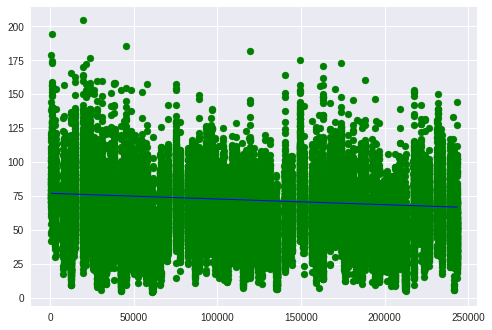

magnitud_1oxidos de nitrogeno
('Coefficients: \n', array([[ -8.83777869e-05]]))
Mean squared error: 7372.09
Variance score: 0.01


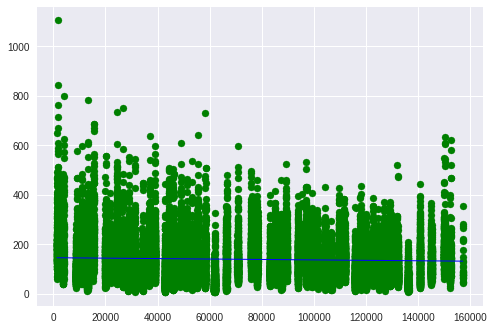

magnitud_Benceno
('Coefficients: \n', array([[ -1.49891233e-06]]))
Mean squared error: 5.03
Variance score: -0.13


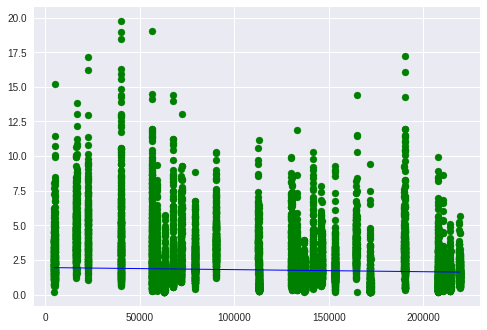

magnitud_Dioxido de azufre
('Coefficients: \n', array([[ -7.95799112e-06]]))
Mean squared error: 119.00
Variance score: -0.03


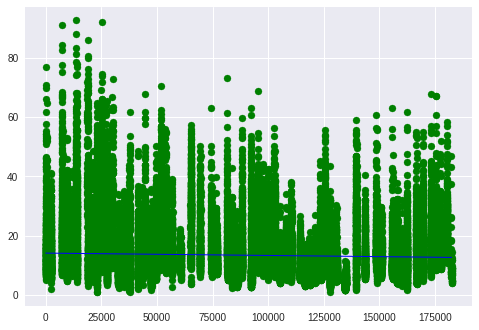

magnitud_Etilbenceno
('Coefficients: \n', array([[ -2.32946069e-06]]))
Mean squared error: 4.84
Variance score: -0.01


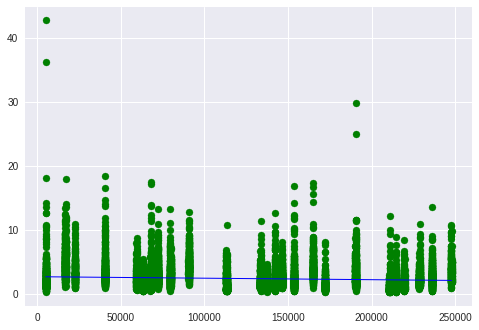

magnitud_Hidrocarburos no metanicos
('Coefficients: \n', array([[  5.04998229e-08]]))
Mean squared error: 0.01
Variance score: -0.02


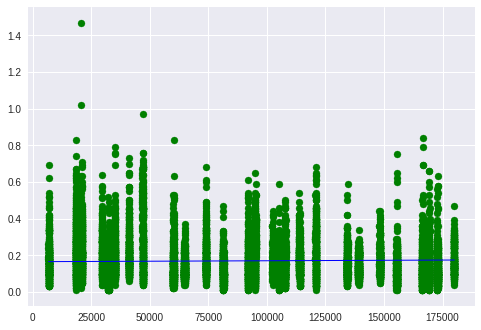

magnitud_Hidrocarburos totales
('Coefficients: \n', array([[ -3.21789608e-08]]))
Mean squared error: 0.03
Variance score: -0.00


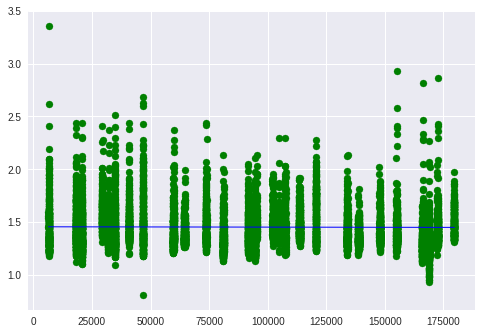

magnitud_Metalxileno
('Coefficients: \n', array([[ -7.99644061e-06]]))
Mean squared error: 31.27
Variance score: 0.01


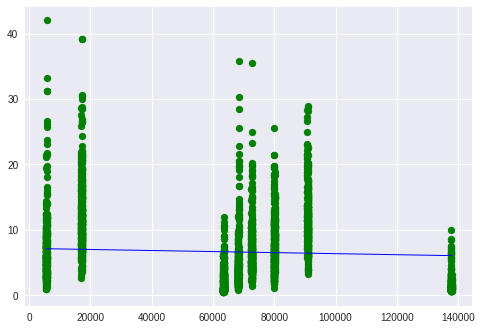

magnitud_Monoxido de carbono
('Coefficients: \n', array([[ -4.72745972e-07]]))
Mean squared error: 0.28
Variance score: -0.05


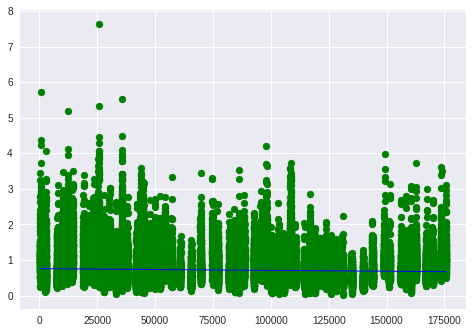

magnitud_Ortoxileno
('Coefficients: \n', array([[ -2.96798314e-06]]))
Mean squared error: 6.49
Variance score: 0.01


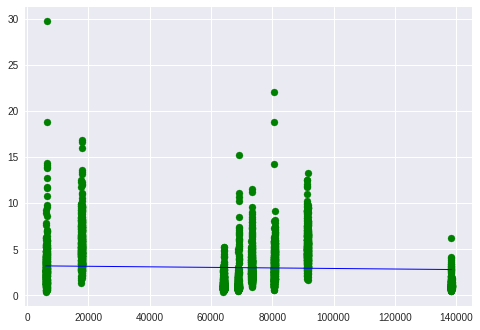

magnitud_Ozono
('Coefficients: \n', array([[  2.46087611e-05]]))
Mean squared error: 378.87
Variance score: -0.05


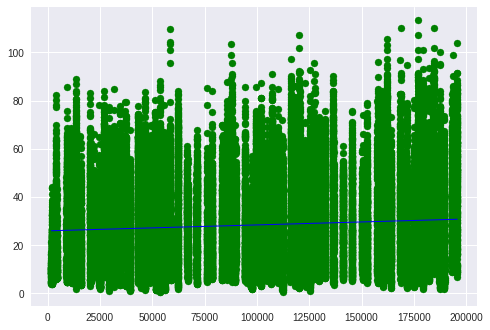

magnitud_Paraxileno
('Coefficients: \n', array([[ -2.75459630e-06]]))
Mean squared error: 5.31
Variance score: 0.01


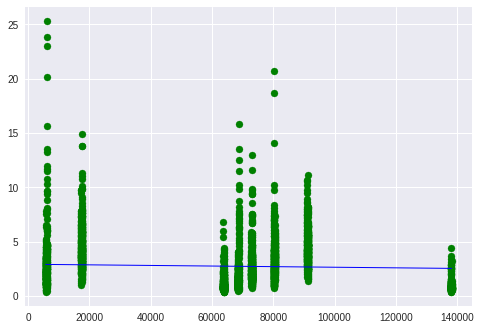

magnitud_particulas 10
('Coefficients: \n', array([[ -2.46759362e-05]]))
Mean squared error: 349.15
Variance score: -0.12


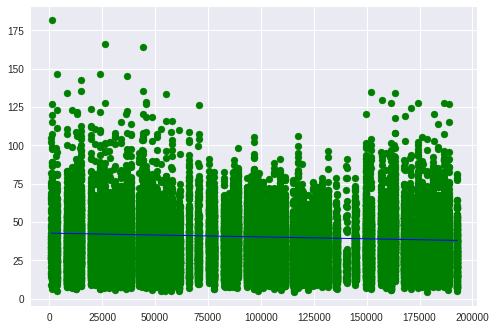

magnitud_Particulas 2,5
('Coefficients: \n', array([[ -1.37113973e-05]]))
Mean squared error: 97.60
Variance score: 0.00


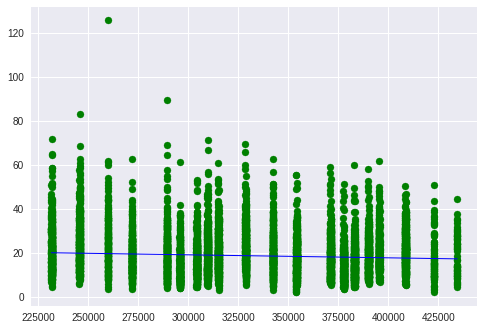

magnitud_Toleuno
('Coefficients: \n', array([[ -8.93602934e-06]]))
Mean squared error: 93.34
Variance score: -0.04


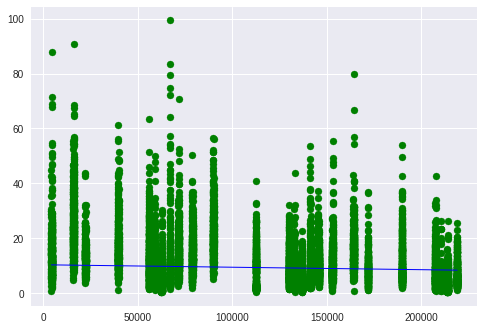

Monoxido de nitrogeno
('Coefficients: \n', array([[  6.42942027e-06]]))
Mean squared error: 1476.26
Variance score: -0.03


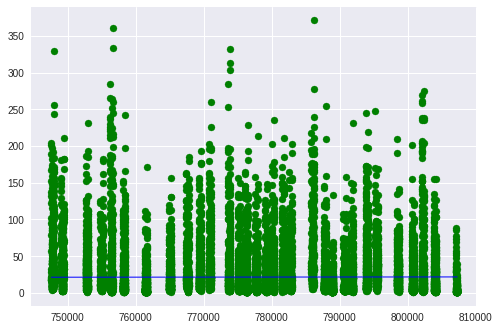

In [14]:

ls= !ls ./datos_por_contaminante/
for fileCSV in ls:
    try:
        data = pd.read_csv('./datos_por_contaminante/'+fileCSV, index_col='Unnamed: 0')
        # Split the data into training/testing sets
        num = int(len(data)*0.8)
        finalData_X_test  = data.index.values[:-num][:,None]
        finalData_X_train = data.index.values[-num:][:,None]

        # Split the targets into training/testing sets
        finalData_y_train = data['VALUE'][-num:][:,None]
        finalData_y_test = data['VALUE'][:-num][:,None]

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(finalData_X_train, finalData_y_train)

        print(fileCSV[:-4])
        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean squared error
        print("Mean squared error: %.2f"
              % np.mean((regr.predict(finalData_X_test) - finalData_y_test) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(finalData_X_test, finalData_y_test))

        # Plot outputs
        plt.scatter(finalData_X_test, finalData_y_test,  color='green')
        plt.plot(finalData_X_test, regr.predict(finalData_X_test), color='blue',linewidth=1)

        #plt.xticks(())
        #plt.yticks(())
        fig = plt.figure()
        plt.show()
        fig.savefig('./Python Charts/'+fileCSV[:-4]+'.png', dpi=100)
       
    except:
        print(fileCSV+' Dont get it')